In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pickle
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from textblob import TextBlob
from sklearn.model_selection import KFold
%matplotlib inline


In [2]:
airbnb = pd.read_pickle('clean_data.pkl')

In [3]:
df = pd.DataFrame(airbnb)
  
# converting each value of column to a string
df['name_clean'] = pd.to_numeric(df['name_clean'], errors = 'coerce')
df['amenities_clean'] = pd.to_numeric(df['amenities_clean'], errors = 'coerce')

In [4]:
#remove all the categorical varaibles

airbnb = airbnb.drop(['name_clean','amenities_clean','host_name','instant_bookable','neighbourhood', 'property_type', 
                     'calculated_host_listings_count','minimum_nights','maximum_nights',
                     'latitude','longitude'], axis=1)

# first create state dummies
airbnb = pd.get_dummies(airbnb, columns=['State', 'neighbourhood_group', 'room_type'])


In [5]:
# Start regression analysis

#independent variable
xmat = airbnb.drop(['price','price_log'],axis=1)

#dependent variable
y = airbnb['price']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)


In [6]:
#Linear Regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

#predicition and coeefitients
y_pred= reg.predict(X_test)

#LR Coefficients
Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=X_train.columns
Coeff["Coefficient"]=reg.coef_
Coeff.sort_values("Coefficient")

### Calculate RMSE
rmseLN = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmseLN

104.51547083339273

In [7]:
### Taking a closer look at the estimates
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X)
est2 = est.fit()
print(est2.summary())

C:\Users\magdana.kondaridze\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     2615.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:21:49   Log-Likelihood:            -6.6149e+05
No. Observations:              108675   AIC:                         1.323e+06
Df Residuals:                  108640   BIC:                         1.323e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

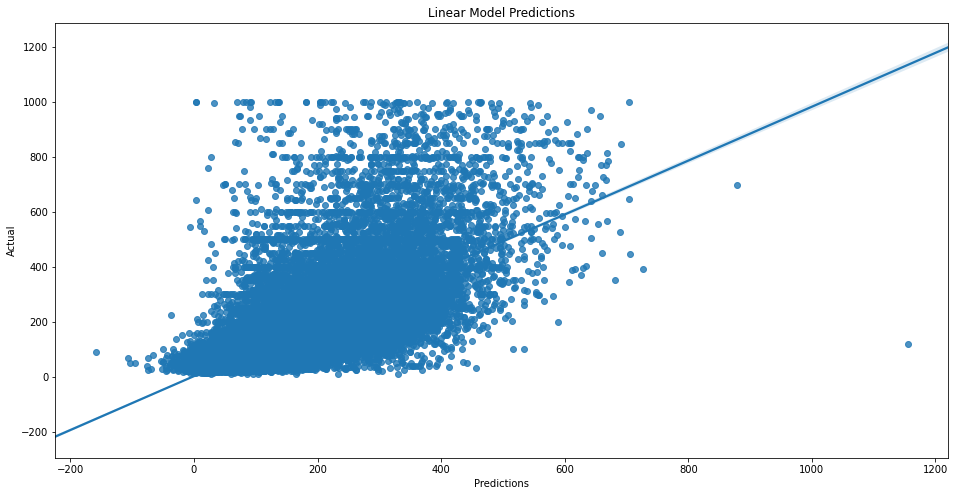

In [8]:
# let's check the accuracy of prediction on a graph

plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

In [9]:
#Ridge Resression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
r_pred = ridge.predict(X_test) 

In [15]:
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

KeyboardInterrupt: 

In [13]:
#LASSO regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [14]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

KeyboardInterrupt: 

In [ ]:
#ElasticNet
enet = ElasticNet(alpha=1.0)
enet.fit(X_train,y_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
coeff_used = np.sum(enet.coef_!=0)
enethat = enet.predict(X_train)
print(test_score)
print(train_score)
#print(lasso.coef_!=0)
#print(coeff_used)
#print(lasso.get_params())
#print(lasso.coef_)
#print(np.sqrt(metrics.mean_squared_error(y_test,yhat)))

In [ ]:
#Linear regression

def linear_reg(X_train, y_train):
    ## Defining parameters
    LR = LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    GridSearch_LR = GridSearchCV(estimator=LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    GridSearch_LR.fit(X_train, y_train)
    best_parameters_LR = GridSearch_LR.best_params_  
    best_score_LR = GridSearch_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)

In [ ]:
#Ridge regression

def ridge_reg(X_train, y_train):
    ## Defining parameters
    model_Ridge= RidgeRegression()

 # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(X_train, y_train)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)


In [ ]:
# Lasso regression

def lasso_reg(X_train, y_train):
    ## Defining parameters
    model_Lasso= Lasso()
    
 # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(X_train, y_train)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)
    

In [ ]:
#Elastic net

def elastic_reg(X_train, y_train):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()


    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)
    
    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(X_train, y_train)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

In [ ]:
#LINEAR
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#RIDGE
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#LASSO
Lasso_model = Lasso(alpha = 1.0)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test)

#ElasticNet
model_enet = ElasticNet(alpha = 1.0, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

In [ ]:
#Mean Absolute Error (MAE) shows the difference between predictions and actual values.
#Root Mean Square Error (RMSE) shows how accurately the model predicts the response.
#R^2 will be calculated to find the goodness of fit measure.

print('-------------Lineer Regression-----------')

print('MAE: %f'% mean_absolute_error(y_test, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))   
print('R2 %f' % r2_score(y_test, y_pred))



print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))



print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))



print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))



In [ ]:
print('---------------Linear ---------------------')

def MAPE(y_test,yhat):
    mape = np.mean(np.abs((y_test - yhat)/y_test))*100
    return mape

reg = Lasso(alpha=1.0)
lm=reg.fit(X_train , y_train)
lm_predict = reg.predict(X_test)
lm_MAPE = MAPE(y_test,lm_predict)
print("MAPE value: ",lm_MAPE)
Accuracylm = 100 - lm_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracylm))


print('---------------Ridge ---------------------')

def MAPE(y_test,yhat):
    mape = np.mean(np.abs((y_test - yhat)/y_test))*100
    return mape

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
r_pred = ridge.predict(X_test) 
ridge_MAPE = MAPE(y_test,r_pred)
print("MAPE value: ",ridge_MAPE)
AccuracyRR = 100 - ridge_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyRR))


print('---------------Lasso ---------------------')

def MAPE(y_test,yhat):
    mape = np.mean(np.abs((y_test - yhat)/y_test))*100
    return mape

lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_test)
Lasso_MAPE = MAPE(y_test,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracyls = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyls))


print('---------------Ridge ---------------------')

def MAPE(y_test,yhat):
    mape = np.mean(np.abs((y_test - yhat)/y_test))*100
    return mape

enet = ElasticNet(alpha=1.0)
enet = enet.fit(X_train , y_train)
enet_predict = enet.predict(X_test)
enet_MAPE = MAPE(y_test,lasso_predict)
print("MAPE value: ",enet_MAPE)
Accuracyenet = 100 - enet_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyenet))


In [ ]:
# Random Forest Estimation

rf = RandomForestRegressor(n_estimators = 20, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)
print(rf.decision_path(X_train))

In [ ]:
# increase trees to see how prediction changes

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)
#print(rf.decision_path(X_train))

In [ ]:
#Random Forest Coesfficients

rf.feature_importances_
CoeffRF = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRF["Variable"]=X_train.columns
CoeffRF["FeatureImportance"]=rf.feature_importances_
CoeffRF.sort_values("FeatureImportance", ascending = False)

In [ ]:
#Random Forest accuracy

def MAPE(y_test,yhat):
    mape = np.mean(np.abs((y_test - yhat)/y_test))*100
    return mape

rf_MAPE = MAPE(y_test,predictions)
print("MAPE value: ",rf_MAPE)
Accuracyrf = 100 - rf_MAPE
print('Accuracy of RF Regression: {:0.2f}%.'.format(Accuracyrf))
print('MAE: %f' % mean_absolute_error(y_test, predictions))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 %f' % r2_score(y_test, predictions))